<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/k%E8%BF%91%E9%84%B0%E5%88%86%E9%A1%9E/sklearn%E5%AF%A6%E4%BD%9C1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=75cde0edbc4c74427f7fa4b9d3731e77ba9e6c396574e23e6e08da9facf81c14
  Stored in directory: /root/.cache/pip/wheels/40/b3/0f/a40dbd1c6861731779f62cc4babcb234387e11d697df70ee97
Successfully built wget


In [2]:
#下載字型
import wget
wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")

'ChineseFont.ttf'

### 如何使用 scikit-learn 的 KNeighborsClassifier 模型來進行分類
- 我們將使用一個簡單的數據集，其中包含兩個特徵（例如，花瓣長度和花瓣寬度），並預測鳶尾花的種類（0、1 或 2）。

模型準確度：0.83


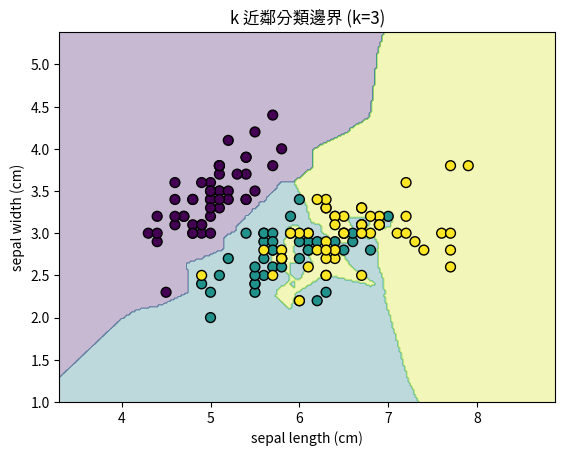

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib as mlp
from matplotlib.font_manager import fontManager

fontManager.addfont('ChineseFont.ttf')
mlp.rc('font', family='ChineseFont')
# 1. 載入數據集
iris = load_iris()
X = iris.data[:, :2]  # 花萼長度和花萼寬度
y = iris.target

# 2. 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 建立 k 近鄰模型
model = KNeighborsClassifier(n_neighbors=3)  # 設定 k=3

# 4. 訓練模型
model.fit(X_train, y_train)

# 5. 進行預測
y_pred = model.predict(X_test)

# 6. 評估模型
accuracy = accuracy_score(y_test, y_pred)
print(f"模型準確度：{accuracy:.2f}")

# 7. 可視化決策邊界
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('k 近鄰分類邊界 (k=3)')
plt.show()